| Device      | Name                      | Model         |
| :---        |           :----:          |          ---: |
| D1          | Xiaomi Redmi Note 10 Pro  |  M2101K6G     |
| D2          | Xiaomi Redmi 9            | M2004J19C     |

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
horizontal_length = 16
vertical_length = 16
plt.figure(figsize=(horizontal_length, vertical_length))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [32]:
device = "D2"

In [33]:
path = './dataset/raw_data/1D2/' + device + '.xlsx'

In [34]:
raw_df = pd.read_excel(path)

In [35]:
open3feet = raw_df[:406]['rssi']

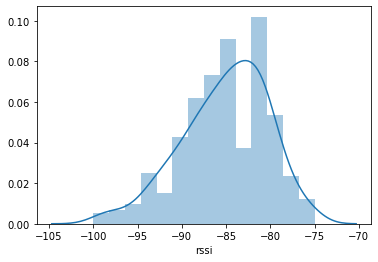

In [36]:
sns.distplot(open3feet)
plt.show()

In [37]:
open3feet.median()

-84.0

In [38]:
open6feet = raw_df[406:926]['rssi']

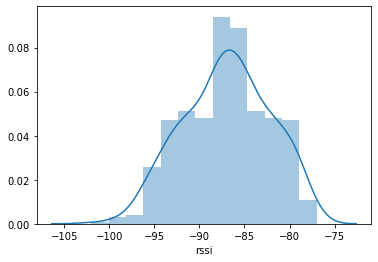

In [39]:
sns.distplot(open6feet)
plt.show()

In [40]:
open6feet.median()

-87.0

In [41]:
open9feet = raw_df[926:]['rssi']

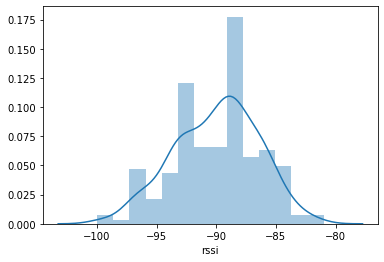

In [42]:
sns.distplot(open9feet)
plt.show()

In [43]:
open9feet.median()

-90.0